# Retrieval evidences

## Notebook setup

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import glob as glob
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns

import bz2
import corner
import json
import pathlib
import pickle
import utils
import warnings

from astropy import constants as const
from astropy import units as uni
from astropy.io import ascii, fits
from astropy.time import Time
from mpl_toolkits.axes_grid1 import ImageGrid

# Default figure dimensions
FIG_WIDE = (11, 5)
FIG_LARGE = (8, 11)

# Figure style
sns.set(style="ticks", palette="colorblind", color_codes=True, context="talk")
params = utils.plot_params()
plt.rcParams.update(params)

## [Dowload data](https://www.dropbox.com/sh/102kasznvvv8dyy/AACMwQ7etBuXlOXQOTWpXWlca?dl=1)

Unzip this into a folder named `data` in the same level as this notebook

## Load

In [5]:
base_dir_fixed_R0 = "data/retrieval_evidence/spot_lower_fixed_R0"
(
    df_Delta_lnZ_fixed,
    df_Delta_lnZ_err_fixed,
    species_min_fixed,
    model_min_fixed,
    data_dict_fixed,
) = utils.get_evidences(base_dir_fixed_R0)

base_dir_fit_R0 = "data/retrieval_evidence/spot_lower_fit_R0"
(
    df_Delta_lnZ_fit,
    df_Delta_lnZ_err_fit,
    species_min_fit,
    model_min_fit,
    data_dict_fit,
) = utils.get_evidences(base_dir_fit_R0)

print("Fixed R0")
print(f"Minimul log-evidence: ({species_min_fixed}, {model_min_fixed})")
display(df_Delta_lnZ_fixed)

print("\nFit R0")
print(f"Minimul log-evidence: ({species_min_fit}, {model_min_fit})")
display(df_Delta_lnZ_fit)

Fixed R0
Minimul log-evidence: (K, clear)


,Na,K,TiO,Na_K,Na_TiO,K_TiO,Na_K_TiO
clear,4.228008,0.000000,6.470431,3.961596,5.965399,5.906551,5.620903
clear+cloud,3.631123,1.485933,5.398483,3.179458,5.170945,4.996205,4.870079
clear+haze,3.684933,2.223177,5.362364,3.221512,5.124867,4.944949,4.720639
clear+cloud+haze,2.848549,1.737777,4.479787,2.382097,4.248182,4.153051,3.856953
clear+spot,4.241980,3.812417,4.241815,3.685709,3.997720,3.751752,3.506001
clear+spot+cloud,3.174436,2.867850,3.291967,2.695057,3.033652,2.801135,2.538111
clear+spot+haze,3.034682,2.817973,3.120746,2.614493,2.828451,2.655219,2.427965
clear+spot+cloud+haze,2.159865,1.938158,2.208348,1.660904,1.910795,1.798888,1.529130



Fit R0
Minimul log-evidence: (K, clear+spot+cloud)


,Na,K,TiO,Na_K,Na_TiO,K_TiO,Na_K_TiO
clear,2.540187,0.807536,4.636170,2.453314,4.717220,4.569445,4.227604
clear+cloud,2.156500,0.728322,4.013794,1.529097,3.802738,3.610931,3.519387
clear+haze,2.299625,1.878195,3.867348,1.792175,3.723402,3.702487,3.249522
clear+cloud+haze,1.651863,1.373049,3.299506,1.265989,2.969531,2.887848,2.801454
clear+spot,1.986855,0.227077,4.224842,1.598080,4.058254,3.906182,3.609893
clear+spot+cloud,1.344115,0.000000,3.385048,0.939643,3.150525,3.149587,2.869141
clear+spot+haze,1.525325,1.085760,3.312821,1.228557,3.072417,2.925748,2.601322
clear+spot+cloud+haze,0.812119,0.648131,2.378183,0.471873,2.203181,2.177578,1.657147


## Plot

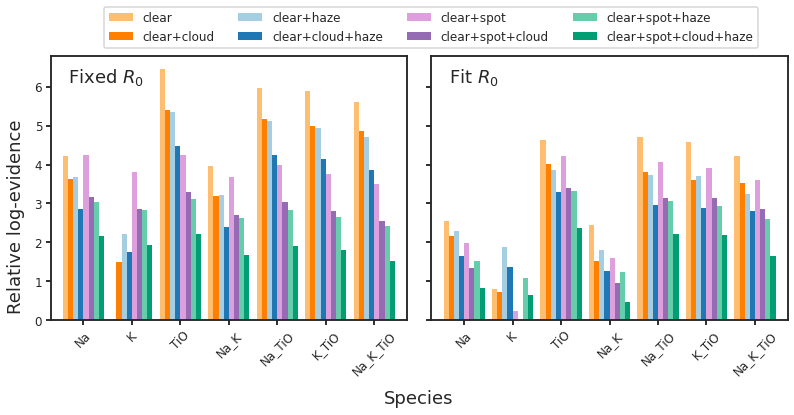

In [11]:
fig, axes = plt.subplots(1, 2, figsize=FIG_WIDE, sharey=True)
ax_left, ax_right = axes

# Left: Fixed R_0
p_fixed = utils.plot_evidence_summary(ax_left, df_Delta_lnZ_fixed)
p_fixed.annotate("Fixed $R_0$", xy=(0.05, 0.9), xycoords="axes fraction")

# Right: Fit R_0
p_fit = utils.plot_evidence_summary(ax_right, df_Delta_lnZ_fit)
p_fit.annotate("Fit $R_0$", xy=(0.05, 0.9), xycoords="axes fraction")

# Combined legend
handles, labels = ax_left.get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="upper center",
    ncol=4,
    fontsize="12",
    bbox_to_anchor=(0.525, 1.1),
)

# Save
fig.text(0.51, -0.02, "Species", ha="center")
fig.text(-0.01, 0.5, "Relative log-evidence", va="center", rotation="vertical")
fig.tight_layout()
fig.set_size_inches(FIG_WIDE)
utils.savefig("../paper/figures/retrieval_evidence/evidence_summary.pdf")